In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import scipy.optimize as opt
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score
import yfinance as yf

In [ ]:
# Suppress SettingWithCopyWarning
pd.options.mode.chained_assignment = None

In [ ]:
# Download Data
df = yf.download('BTC-USD', start='2017-01-01', end='2024-08-31')
df = df[['Close']]
df.head()

[*********************100%***********************]  1 of 1 completed


,Close
Date,
2017-01-01,998.325012
2017-01-02,1021.750000
2017-01-03,1043.839966
2017-01-04,1154.729980
2017-01-05,1013.380005


In [ ]:
# Calculate Simple Moving Averages (SMA)
df['5-day MA'] = df['Close'].rolling(window=5).mean()
df['20-day MA'] = df['Close'].rolling(window=20).mean()
df['50-day MA'] = df['Close'].rolling(window=50).mean()
df['200-day MA'] = df['Close'].rolling(window=200).mean()

In [ ]:
# Generate Trading Signals. When short term SMA crosses over long term SMA label as Buy otherwise Sell.
df['Signal_5_20'] = np.where(df['5-day MA'] > df['20-day MA'], 1, -1)  # Strategy 1
df['Signal_5_50'] = np.where(df['5-day MA'] > df['50-day MA'], 1, -1)  # Strategy 2
df['Signal_5_200'] = np.where(df['5-day MA'] > df['200-day MA'], 1, -1)  # Strategy 3
df['Signal_20_50'] = np.where(df['20-day MA'] > df['50-day MA'], 1, -1)  # Strategy 4
df['Signal_20_200'] = np.where(df['20-day MA'] > df['200-day MA'], 1, -1)  # Strategy 5
df['Signal_50_200'] = np.where(df['50-day MA'] > df['200-day MA'], 1, -1)  # Strategy 6
df = df.dropna()  # Drop rows with NaN values (from moving averages)
df.head()

,Close,5-day MA,20-day MA,50-day MA,200-day MA,Signal_5_20,Signal_5_50,Signal_5_200,Signal_20_50,Signal_20_200,Signal_50_200
Date,,,,,,,,,,,
2017-07-19,2273.429932,2149.879932,2392.818994,2534.961602,1562.707278,-1,-1,1,-1,1,1
2017-07-20,2817.600098,2313.627954,2409.656995,2545.585405,1571.803654,-1,-1,1,-1,1,1
2017-07-21,2667.760010,2461.215967,2421.317493,2550.783008,1580.033704,1,-1,1,-1,1,1
2017-07-22,2810.120117,2577.558008,2436.500000,2557.214409,1588.865104,1,1,1,-1,1,1
2017-07-23,2730.399902,2659.862012,2444.816992,2561.515405,1596.743454,1,1,1,-1,1,1


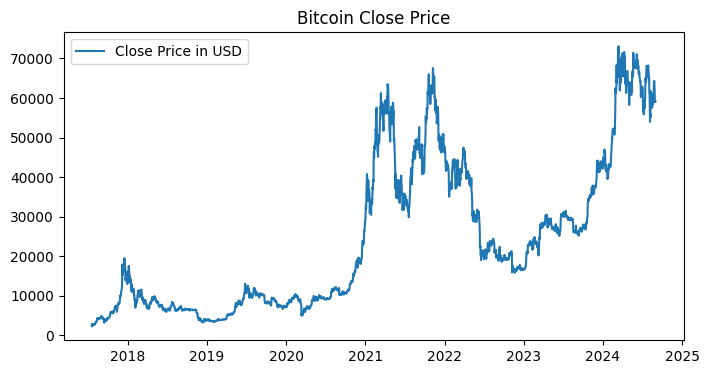

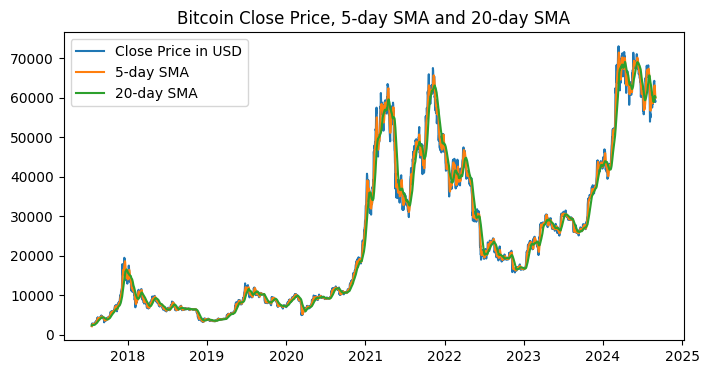

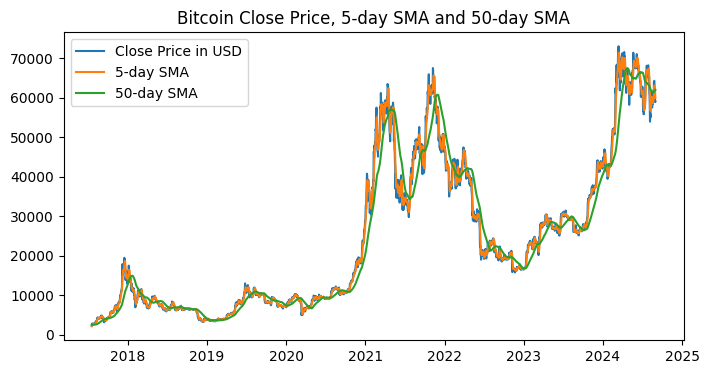

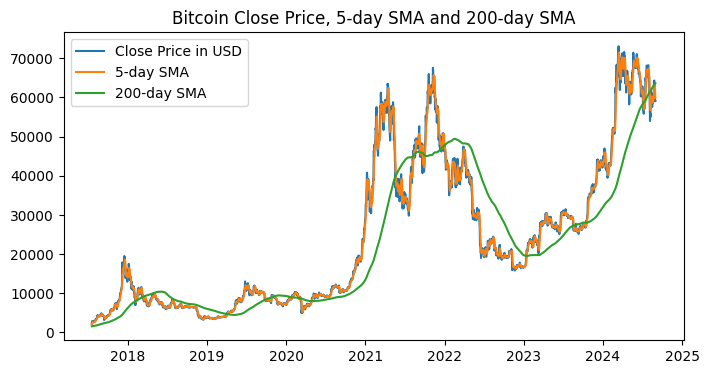

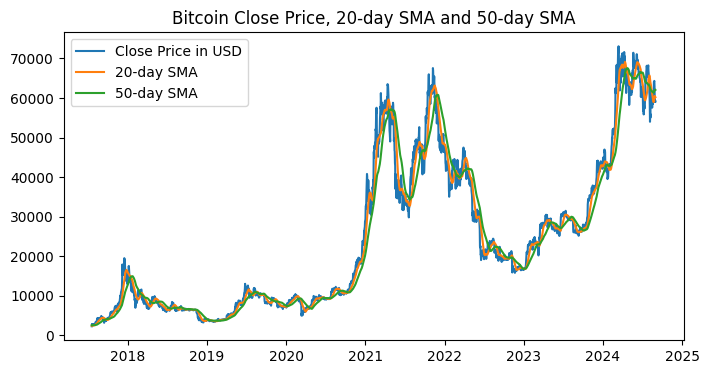

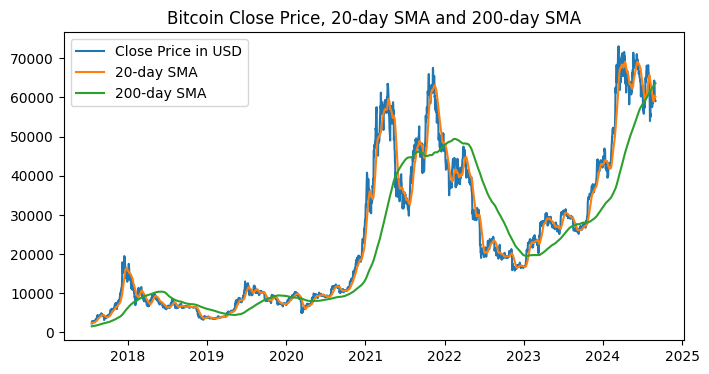

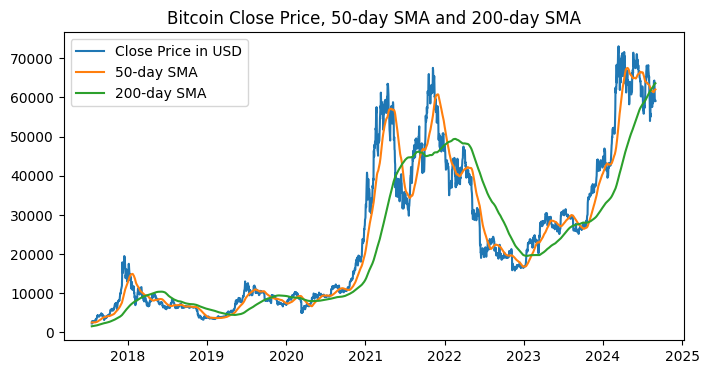

In [ ]:
# Plot charts to understand Cross overs across different strategies

# 0
plt.figure(figsize=(8, 4))
plt.plot(df.index, df['Close'], label='Close Price in USD')
plt.title('Bitcoin Close Price')
plt.legend()
plt.show()
# 1
plt.figure(figsize=(8, 4))
plt.plot(df.index, df['Close'], label='Close Price in USD')
plt.plot(df.index, df['5-day MA'], label='5-day SMA')
plt.plot(df.index, df['20-day MA'], label='20-day SMA')
plt.title('Bitcoin Close Price, 5-day SMA and 20-day SMA')
plt.legend()
plt.show()
# 2
plt.figure(figsize=(8, 4))
plt.plot(df.index, df['Close'], label='Close Price in USD')
plt.plot(df.index, df['5-day MA'], label='5-day SMA')
plt.plot(df.index, df['50-day MA'], label='50-day SMA')
plt.title('Bitcoin Close Price, 5-day SMA and 50-day SMA')
plt.legend()
plt.show()
# 3
plt.figure(figsize=(8, 4))
plt.plot(df.index, df['Close'], label='Close Price in USD')
plt.plot(df.index, df['5-day MA'], label='5-day SMA')
plt.plot(df.index, df['200-day MA'], label='200-day SMA')
plt.title('Bitcoin Close Price, 5-day SMA and 200-day SMA')
plt.legend()
plt.show()
# 4
plt.figure(figsize=(8, 4))
plt.plot(df.index, df['Close'], label='Close Price in USD')
plt.plot(df.index, df['20-day MA'], label='20-day SMA')
plt.plot(df.index, df['50-day MA'], label='50-day SMA')
plt.title('Bitcoin Close Price, 20-day SMA and 50-day SMA')
plt.legend()
plt.show()
# 5
plt.figure(figsize=(8, 4))
plt.plot(df.index, df['Close'], label='Close Price in USD')
plt.plot(df.index, df['20-day MA'], label='20-day SMA')
plt.plot(df.index, df['200-day MA'], label='200-day SMA')
plt.title('Bitcoin Close Price, 20-day SMA and 200-day SMA')
plt.legend()
plt.show()
# 5
plt.figure(figsize=(8, 4))
plt.plot(df.index, df['Close'], label='Close Price in USD')
plt.plot(df.index, df['50-day MA'], label='50-day SMA')
plt.plot(df.index, df['200-day MA'], label='200-day SMA')
plt.title('Bitcoin Close Price, 50-day SMA and 200-day SMA')
plt.legend()
plt.show()

In [ ]:
df.to_csv("BitCoin_data.csv")

In [ ]:
# Prepare the Data for Model Training
X = df[['5-day MA','20-day MA', '50-day MA', '200-day MA']]
y_st1 = df['Signal_5_20']
y_st2 = df['Signal_5_50']
y_st3 = df['Signal_5_200']
y_st4 = df['Signal_20_50']
y_st5 = df['Signal_20_200']
y_st6 = df['Signal_50_200']

X_train_st1, X_test_st1, y_train_st1, y_test_st1 = train_test_split(X, y_st1, test_size=0.2, shuffle=False)
X_train_st2, X_test_st2, y_train_st2, y_test_st2 = train_test_split(X, y_st2, test_size=0.2, shuffle=False)
X_train_st3, X_test_st3, y_train_st3, y_test_st3 = train_test_split(X, y_st3, test_size=0.2, shuffle=False)
X_train_st4, X_test_st4, y_train_st4, y_test_st4 = train_test_split(X, y_st4, test_size=0.2, shuffle=False)
X_train_st5, X_test_st5, y_train_st5, y_test_st5 = train_test_split(X, y_st5, test_size=0.2, shuffle=False)
X_train_st6, X_test_st6, y_train_st6, y_test_st6 = train_test_split(X, y_st6, test_size=0.2, shuffle=False)

In [ ]:
# Train Model
def train_model(X_train, X_test, y_train,y_test, Strategy):
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    lr_model = LogisticRegression()
    dt_model = DecisionTreeClassifier()

    rf_model.fit(X_train, y_train)
    lr_model.fit(X_train, y_train)
    dt_model.fit(X_train, y_train)
# Make Predictions
    rf_predictions = rf_model.predict(X_test)
    lr_predictions = lr_model.predict(X_test)
    dt_predictions = dt_model.predict(X_test)

# Evaluate Models
    print( "=======================================================================================\n")
    print( "Strategy:" , Strategy , "\n")
    print("Random Forest Accuracy:", accuracy_score(y_test, rf_predictions))
    print("Random Forest Precision:", precision_score(y_test, rf_predictions))
    print("Random Forest Recall:", recall_score(y_test, rf_predictions))
    print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_predictions))
    print("Logistic Regression Precision:", precision_score(y_test, lr_predictions))
    print("Logistic Regression Recall:", recall_score(y_test, lr_predictions))
    print("Decision Tree Accuracy:", accuracy_score(y_test, dt_predictions))
    print("Decision Tree Precision:", precision_score(y_test, dt_predictions))
    print("Decision Tree Recall:", recall_score(y_test, dt_predictions))
    print( "=======================================================================================\n")

    ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, rf_predictions)).plot(cmap=plt.cm.Blues)
    plt.title('Random Forest Confusion Matrix')
    plt.show()

    ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, lr_predictions)).plot(cmap=plt.cm.Blues  )
    plt.title('Logistic Regression Confusion Matrix')
    plt.show()

    ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, dt_predictions)).plot(cmap=plt.cm.Blues)
    plt.title('Decision Tree Confusion Matrix')
    plt.show()

    # Return the trained models
    return rf_model, lr_model, dt_model # return the models

In [ ]:
# Simulate Trading
def simulate_trading(df, model, column_name):
    cash = 10000  # Initial cash amount
    portfolio = 0  # Initial portfolio (number of assets held)
    cumulative_gain = 0  # Track cumulative gain
    buy_price = 0  # Track the price at which the asset was bought

    df['Portfolio Value'] = 0  # Placeholder for portfolio value over time using classification model
    df['Portfolio Value'] = df['Portfolio Value'].astype(float)
    df['Cash Value'] = 0  # Placeholder for portfolio value over time using classification model
    df['Cash Value'] = df['Cash Value'].astype(float)
    df['Buy/Sell'] = ''  # Placeholder for buy/sell signals
    df['Portfolio Value Orig'] = 0  # Placeholder for portfolio value over time using statistical model
    df['Portfolio Value Orig'] = df['Portfolio Value Orig'].astype(float)
    df['Buy/Sell Orig'] = ''  # Placeholder for buy/sell signals for statistical model
    df['Prediction'] = 0  # Placeholder for portfolio value over time
    df['Cash Value Orig'] = 0  # Placeholder for portfolio value over time using classification model
    df['Cash Value Orig'] = df['Cash Value Orig'].astype(float)

    # Calculation of portfolio using classification model direction
    for i in range(0, len(df)):
        # Prepare features for prediction
        features = df[['5-day MA','20-day MA', '50-day MA', '200-day MA']].iloc[i].to_frame().T
        # Predict using the model and strategy
        prediction = model.predict(features)[0]
        df.loc[df.index[i], 'Prediction'] = prediction
        df['Prediction'] = df['Prediction'].astype(int)
        # Portfolio Calculation using ML direction
        if prediction == 1 and portfolio == 0 and cash > 0:  # Buy signal and enough cash
            buy_price = df['Close'].iloc[i]
            portfolio = cash / buy_price
            cash = 0
            df['Buy/Sell'].iloc[i] = 'Buy'
        elif prediction == -1 and portfolio > 0:  # Sell signal and holding assets
            sell_price = df['Close'].iloc[i]
            gain = (sell_price - buy_price) * portfolio
            cumulative_gain += gain
            cash = portfolio * sell_price
            portfolio = 0
            df['Buy/Sell'].iloc[i] = 'Sell'
        else:
            df['Buy/Sell'].iloc[i] = 'Hold'

        # Calculate current portfolio value (cash + value of assets held)
        df.loc[df.index[i], 'Portfolio Value'] = cash + (portfolio * df['Close'].iloc[i])
        df.loc[df.index[i], 'Cash Value'] = cash

    # Calculation of portfolio using statistical direction
    cash = 10000  # Initial cash amount
    portfolio = 0  # Initial portfolio (number of assets held)
    cumulative_gain = 0  # Track cumulative gain
    buy_price = 0  # Track the price at which the asset was bought
    for i in range(0, len(df)):
        # Portfolio Calculation using Statistical direction
        if df[column_name].iloc[i] == 1 and portfolio == 0 and cash > 0:  # Buy signal and enough cash
            buy_price = df['Close'].iloc[i]
            portfolio = cash / buy_price
            cash = 0
            df['Buy/Sell Orig'].iloc[i] = 'Buy'
        elif df[column_name].iloc[i] == -1 and portfolio > 0:  # Sell signal and holding assets
            sell_price = df['Close'].iloc[i]
            gain = (sell_price - buy_price) * portfolio
            cumulative_gain += gain
            cash = portfolio * sell_price
            portfolio = 0
            df['Buy/Sell Orig'].iloc[i] = 'Sell'
        else:
            df['Buy/Sell Orig'].iloc[i] = 'Hold'

        # Calculate current portfolio value (cash + value of assets held)
        df.loc[df.index[i], 'Portfolio Value Orig'] = cash + (portfolio * df['Close'].iloc[i])
        df.loc[df.index[i], 'Cash Value Orig'] = cash


    # Return the cumulative gain and final portfolio value
    df['Portfolio Value'] = df['Portfolio Value'].astype(float)
    df['Portfolio Value Orig'] = df['Portfolio Value Orig'].astype(float)
    final_value_model = df['Portfolio Value'].iloc[-1]
    final_value_stat = df['Portfolio Value Orig'].iloc[-1]

    plt.figure(figsize=(8, 4))
    plt.plot(df.index, df['Portfolio Value Orig'], label='Statistical Model')
    plt.plot(df.index, df['Portfolio Value'], label='Classificication Model')
    plt.title('Portfolio Value With Statistical Vs Classification')
    plt.legend()
    plt.show()

    return final_value_model,final_value_stat, df[['Prediction','Buy/Sell','Portfolio Value','Cash Value',column_name,'Buy/Sell Orig','Portfolio Value Orig','Cash Value Orig']]


Strategy: st1 

Random Forest Accuracy: 0.7365384615384616
Random Forest Precision: 0.7716262975778547
Random Forest Recall: 0.7585034013605442
Logistic Regression Accuracy: 1.0
Logistic Regression Precision: 1.0
Logistic Regression Recall: 1.0
Decision Tree Accuracy: 0.6634615384615384
Decision Tree Precision: 0.7553648068669528
Decision Tree Recall: 0.5986394557823129



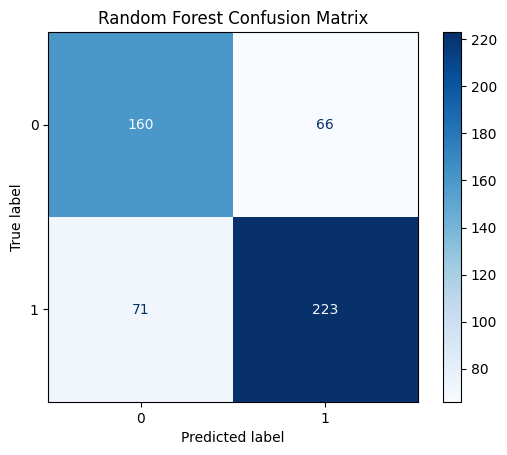

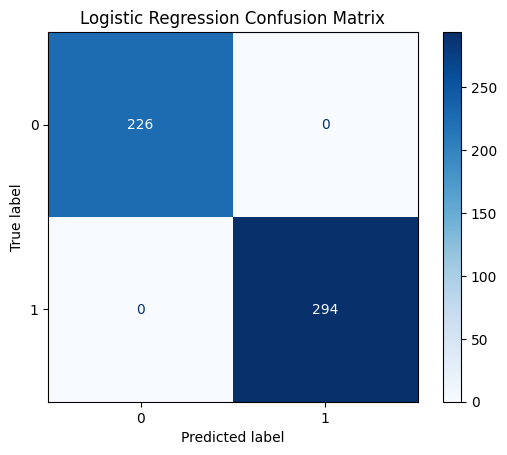

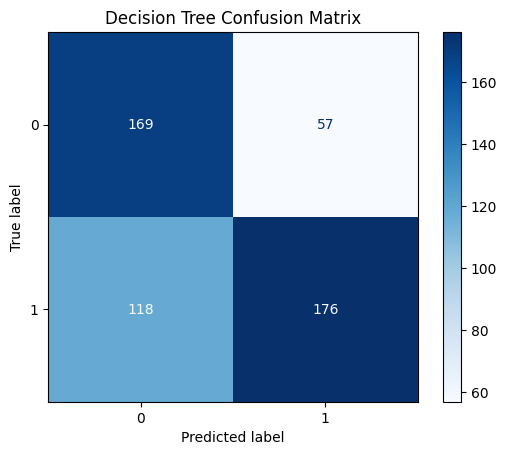

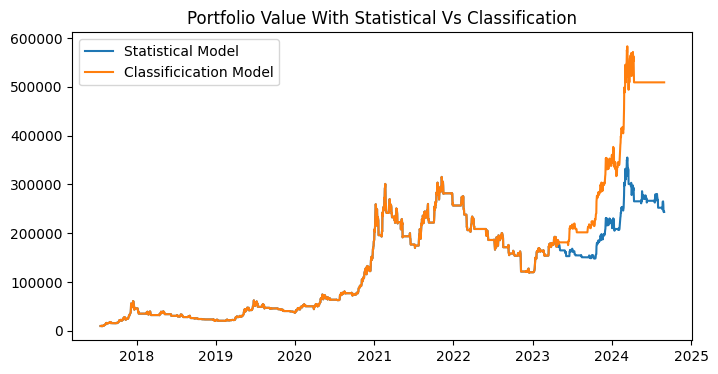

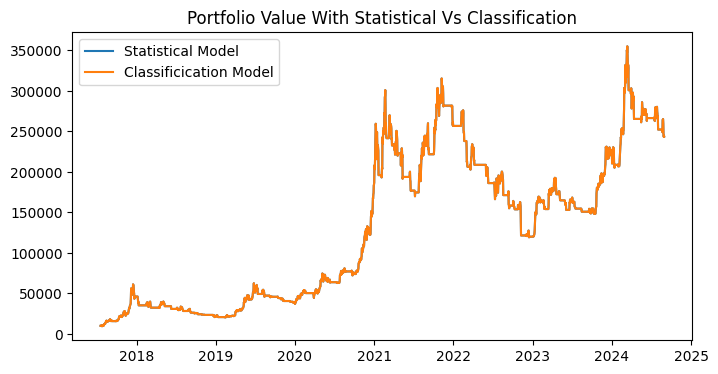

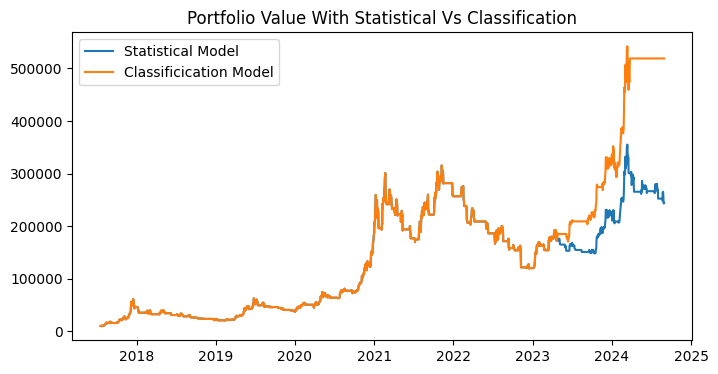

In [ ]:
# Strategy 1 : 5 Days and 20 Days MVA Crossover
df_rf_st1 =pd.DataFrame()
df_lr_st1 =pd.DataFrame()
df_dt_st1 =pd.DataFrame()
rf_model, lr_model, dt_model =train_model(X_train_st1, X_test_st1, y_train_st1, y_test_st1, 'st1')
rf_final_model_st1, rf_final_stat_st1, df_rf_st1 = simulate_trading(df.copy(), rf_model, 'Signal_5_20')
lr_final_model_st1, lr_final_stat_st1, df_lr_st1 = simulate_trading(df.copy(), lr_model, 'Signal_5_20')
dt_final_model_st1, dt_final_stat_st1, df_dt_st1 = simulate_trading(df.copy(), dt_model, 'Signal_5_20')

df_rf_st1.to_csv("BitCoin_df_rf_st1.csv")
df_lr_st1.to_csv("BitCoin_df_lr_st1.csv")
df_dt_st1.to_csv("BitCoin_df_dt_st1.csv")


Strategy: st2 

Random Forest Accuracy: 0.6923076923076923
Random Forest Precision: 0.7094017094017094
Random Forest Recall: 0.8110749185667753
Logistic Regression Accuracy: 0.9980769230769231
Logistic Regression Precision: 0.9967532467532467
Logistic Regression Recall: 1.0
Decision Tree Accuracy: 0.6153846153846154
Decision Tree Precision: 0.708171206225681
Decision Tree Recall: 0.5928338762214984



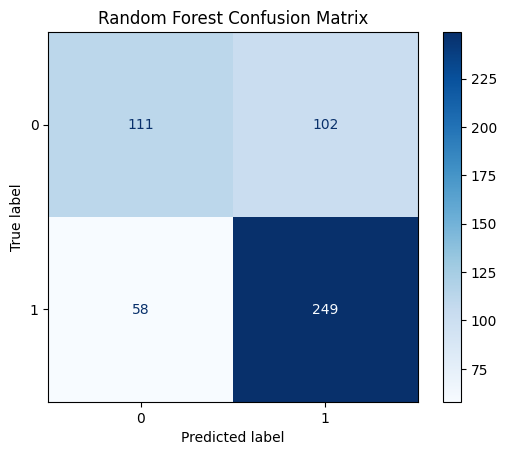

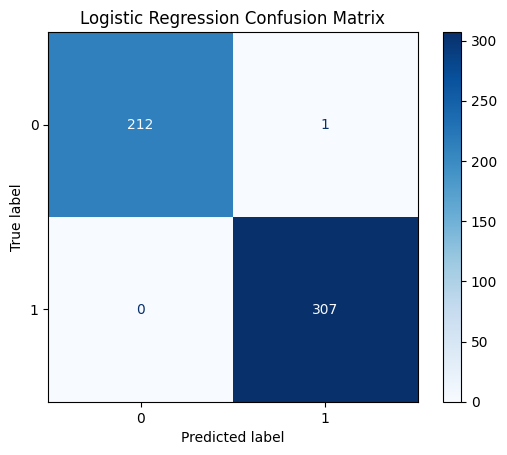

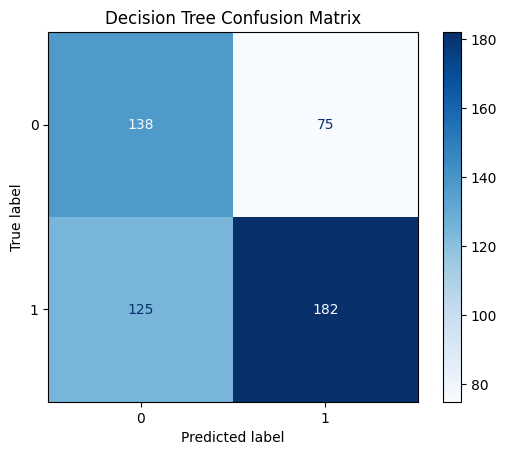

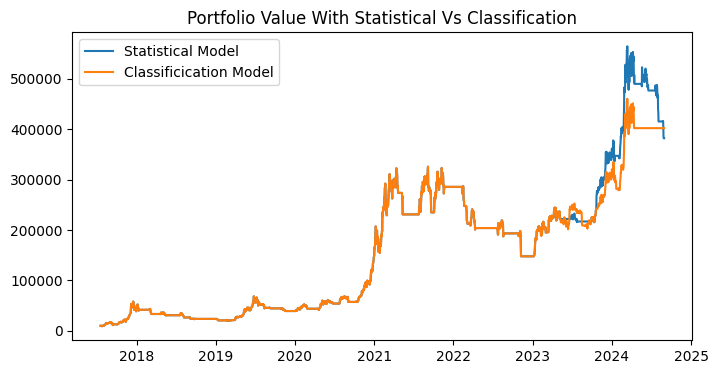

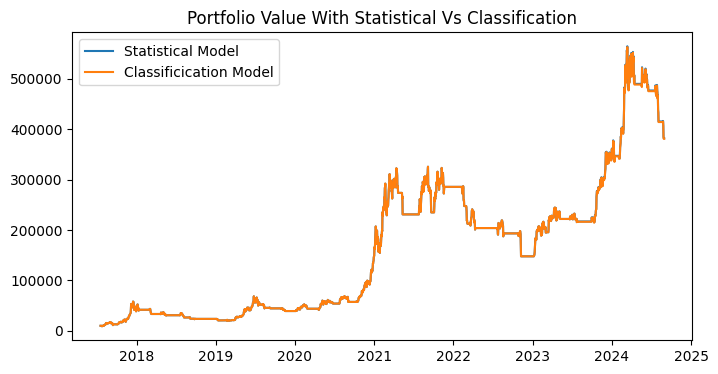

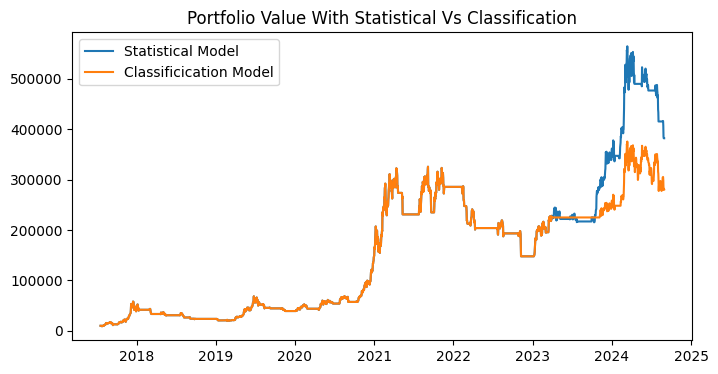

In [ ]:
# Strategy 2 : 5 Days and 50 Days MVA Crossover
df_rf_st2 =pd.DataFrame()
df_lr_st2 =pd.DataFrame()
df_dt_st2 =pd.DataFrame()
rf_model, lr_model, dt_model =train_model(X_train_st2, X_test_st2, y_train_st2, y_test_st2, 'st2')
rf_final_model_st2, rf_final_stat_st2, df_rf_st2 = simulate_trading(df.copy(), rf_model, 'Signal_5_50')
lr_final_model_st2, lr_final_stat_st2, df_lr_st2 = simulate_trading(df.copy(), lr_model, 'Signal_5_50')
dt_final_model_st2, dt_final_stat_st2, df_dt_st2 = simulate_trading(df.copy(), dt_model, 'Signal_5_50')

df_rf_st2.to_csv("BitCoin_df_rf_st2.csv")
df_lr_st2.to_csv("BitCoin_df_lr_st2.csv")
df_dt_st2.to_csv("BitCoin_df_dt_st2.csv")


Strategy: st3 

Random Forest Accuracy: 0.4423076923076923
Random Forest Precision: 0.8333333333333334
Random Forest Recall: 0.39906103286384975
Logistic Regression Accuracy: 0.9980769230769231
Logistic Regression Precision: 1.0
Logistic Regression Recall: 0.9976525821596244
Decision Tree Accuracy: 0.3192307692307692
Decision Tree Precision: 1.0
Decision Tree Recall: 0.16901408450704225



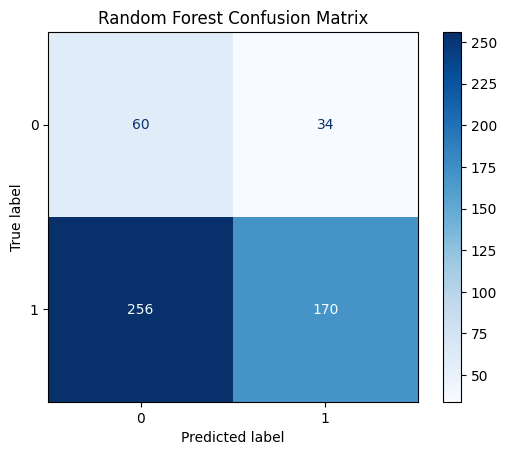

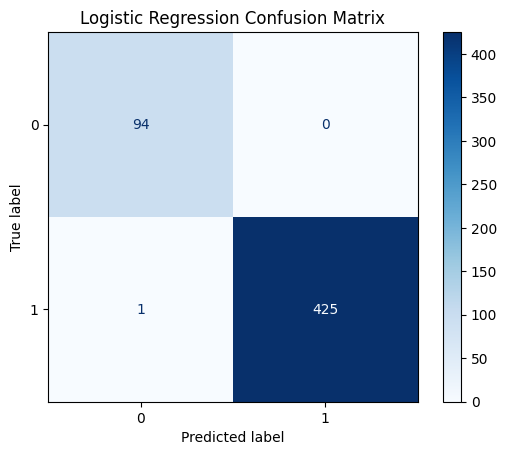

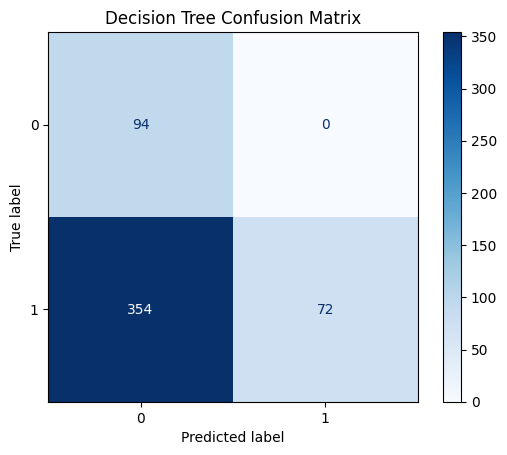

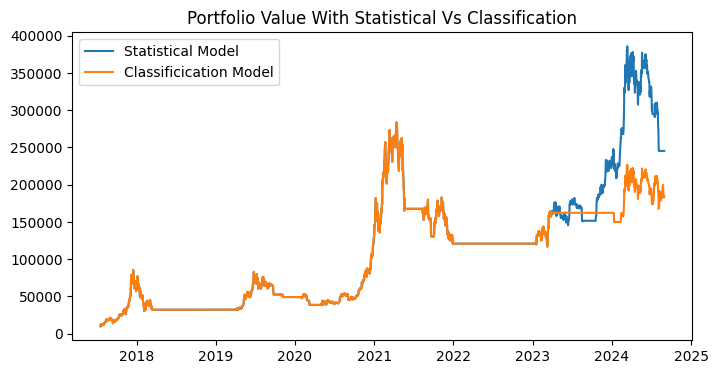

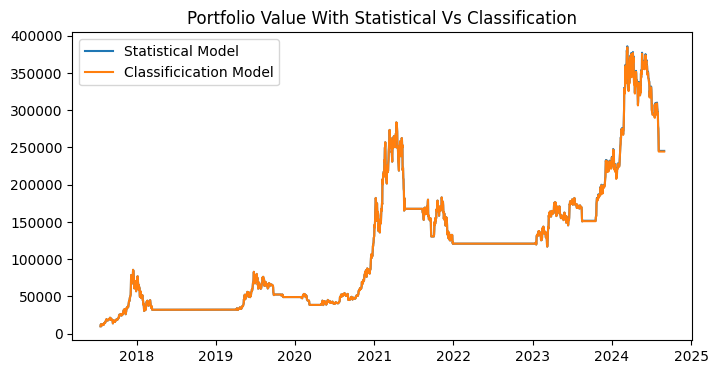

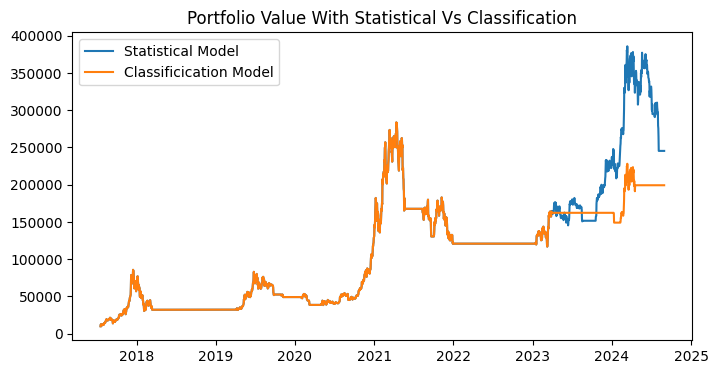

In [ ]:
# Strategy 3 : 5 Days and 200 Days MVA Crossover
df_rf_st3 =pd.DataFrame()
df_lr_st3 =pd.DataFrame()
df_dt_st3 =pd.DataFrame()
rf_model, lr_model, dt_model =train_model(X_train_st3, X_test_st3, y_train_st3, y_test_st3, 'st3')
rf_final_model_st3, rf_final_stat_st3, df_rf_st3 = simulate_trading(df.copy(), rf_model, 'Signal_5_200')
lr_final_model_st3, lr_final_stat_st3, df_lr_st3 = simulate_trading(df.copy(), lr_model, 'Signal_5_200')
dt_final_model_st3, dt_final_stat_st3, df_dt_st3 = simulate_trading(df.copy(), dt_model, 'Signal_5_200')

df_rf_st3.to_csv("BitCoin_df_rf_st3.csv")
df_lr_st3.to_csv("BitCoin_df_lr_st3.csv")
df_dt_st3.to_csv("BitCoin_df_dt_st3.csv")


Strategy: st4 

Random Forest Accuracy: 0.6
Random Forest Precision: 0.5984405458089669
Random Forest Recall: 0.9935275080906149
Logistic Regression Accuracy: 0.9961538461538462
Logistic Regression Precision: 1.0
Logistic Regression Recall: 0.9935275080906149
Decision Tree Accuracy: 0.573076923076923
Decision Tree Precision: 0.5882352941176471
Decision Tree Recall: 0.9385113268608414



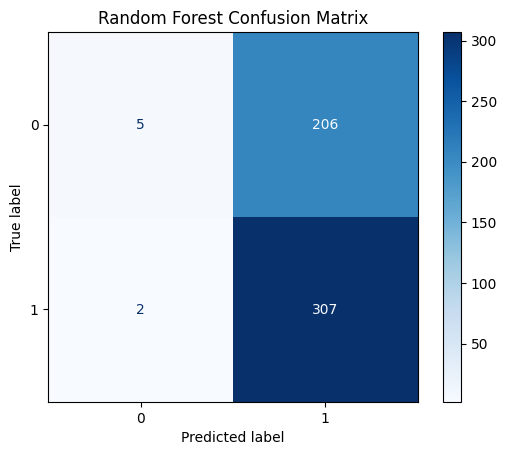

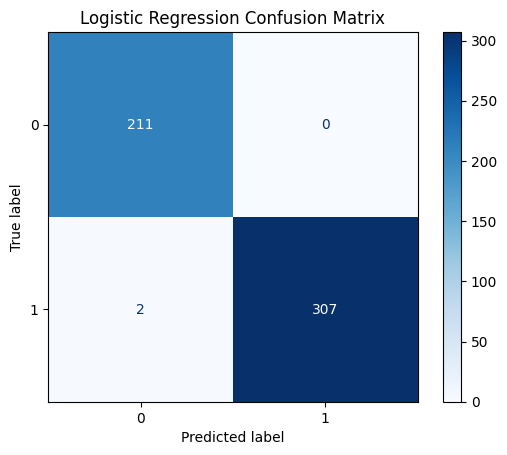

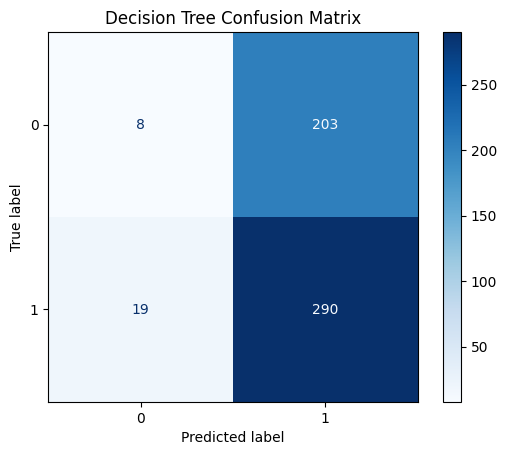

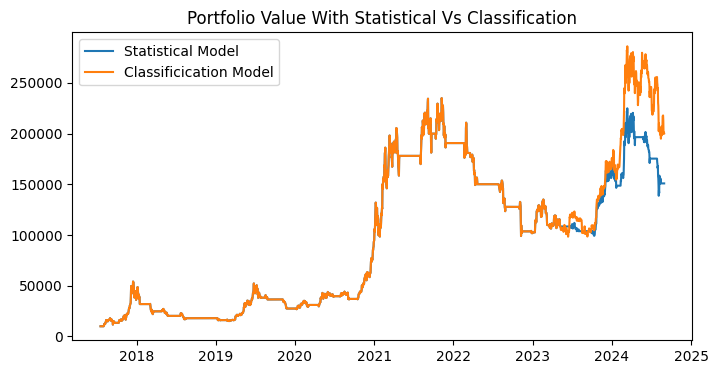

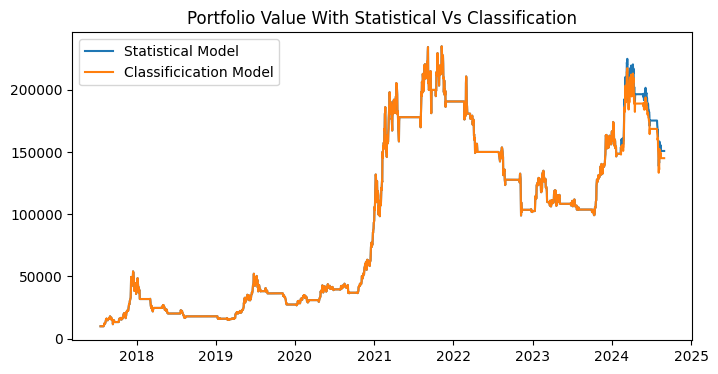

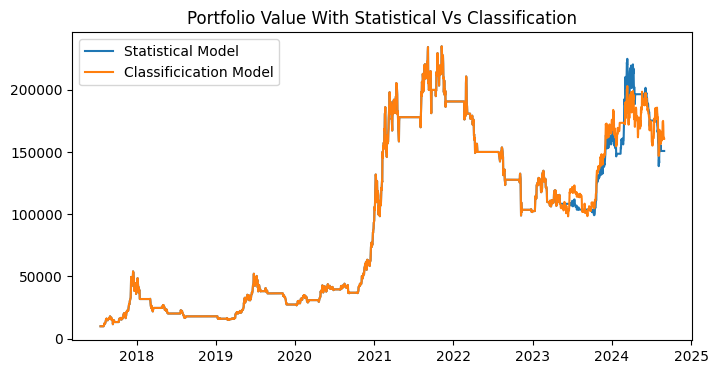

In [ ]:
# Strategy 4 : 20 Days and 50 Days MVA Crossover
df_rf_st4 =pd.DataFrame()
df_lr_st4 =pd.DataFrame()
df_dt_st4 =pd.DataFrame()
rf_model, lr_model, dt_model =train_model(X_train_st4, X_test_st4, y_train_st4, y_test_st4, 'st4')
rf_final_model_st4, rf_final_stat_st4, df_rf_st4 = simulate_trading(df.copy(), rf_model, 'Signal_20_50')
lr_final_model_st4, lr_final_stat_st4, df_lr_st4 = simulate_trading(df.copy(), lr_model, 'Signal_20_50')
dt_final_model_st4, dt_final_stat_st4, df_dt_st4 = simulate_trading(df.copy(), dt_model, 'Signal_20_50')

df_rf_st4.to_csv("BitCoin_df_rf_st4.csv")
df_lr_st4.to_csv("BitCoin_df_lr_st4.csv")
df_dt_st4.to_csv("BitCoin_df_dt_st4.csv")


Strategy: st5 

Random Forest Accuracy: 0.45576923076923076
Random Forest Precision: 0.9095477386934674
Random Forest Recall: 0.40582959641255606
Logistic Regression Accuracy: 1.0
Logistic Regression Precision: 1.0
Logistic Regression Recall: 1.0
Decision Tree Accuracy: 0.28076923076923077
Decision Tree Precision: 1.0
Decision Tree Recall: 0.16143497757847533



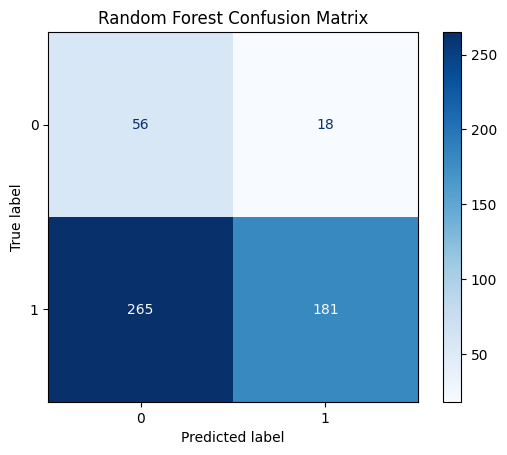

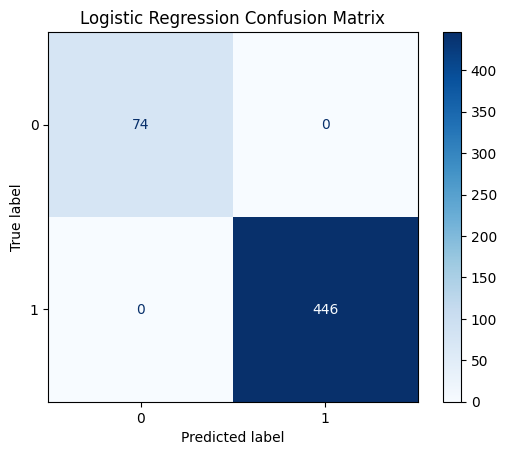

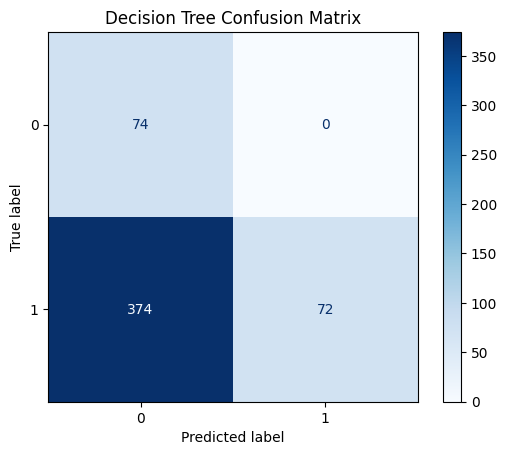

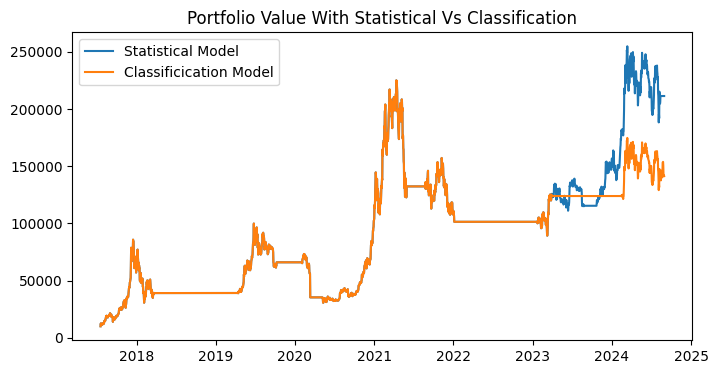

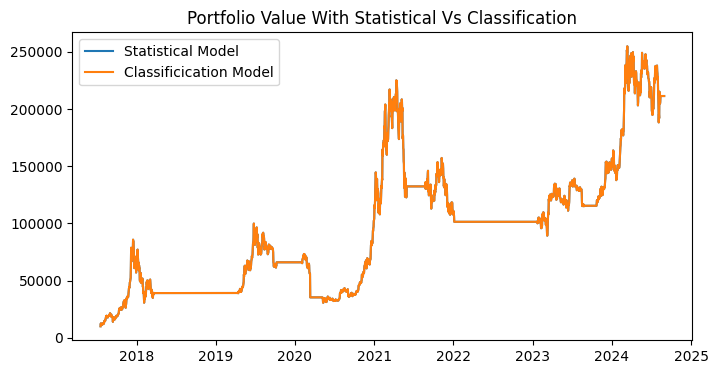

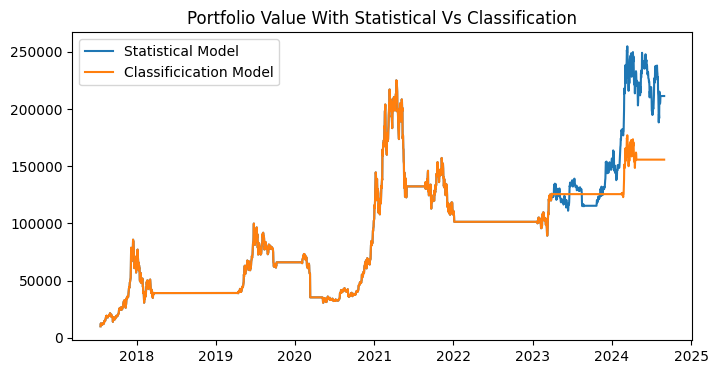

In [ ]:
# Strategy 5 : 20 Days and 200 Days MVA Crossover
df_rf_st5 =pd.DataFrame()
df_lr_st5 =pd.DataFrame()
df_dt_st5 =pd.DataFrame()
rf_model, lr_model, dt_model =train_model(X_train_st5, X_test_st5, y_train_st5, y_test_st5, 'st5')
rf_final_model_st5, rf_final_stat_st5, df_rf_st5 = simulate_trading(df.copy(), rf_model, 'Signal_20_200')
lr_final_model_st5, lr_final_stat_st5, df_lr_st5 = simulate_trading(df.copy(), lr_model, 'Signal_20_200')
dt_final_model_st5, dt_final_stat_st5, df_dt_st5 = simulate_trading(df.copy(), dt_model, 'Signal_20_200')

df_rf_st5.to_csv("BitCoin_df_rf_st5.csv")
df_lr_st5.to_csv("BitCoin_df_lr_st5.csv")
df_dt_st5.to_csv("BitCoin_df_dt_st5.csv")


Strategy: st6 

Random Forest Accuracy: 0.4442307692307692
Random Forest Precision: 0.8970588235294118
Random Forest Recall: 0.4057649667405765
Logistic Regression Accuracy: 1.0
Logistic Regression Precision: 1.0
Logistic Regression Recall: 1.0
Decision Tree Accuracy: 0.27884615384615385
Decision Tree Precision: 1.0
Decision Tree Recall: 0.16851441241685144



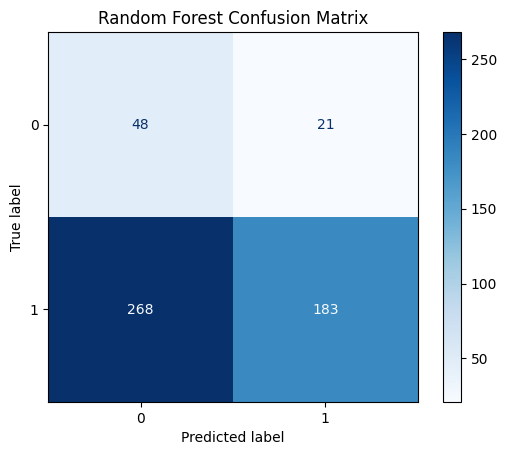

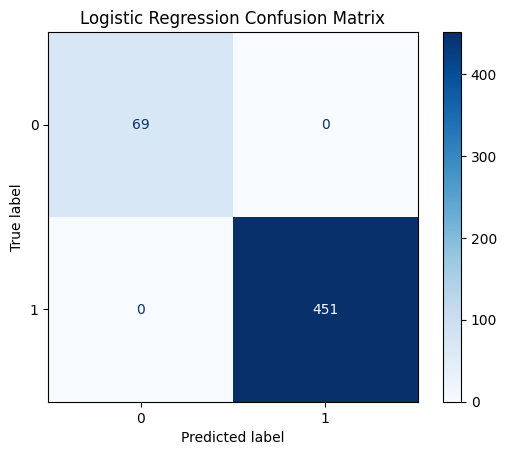

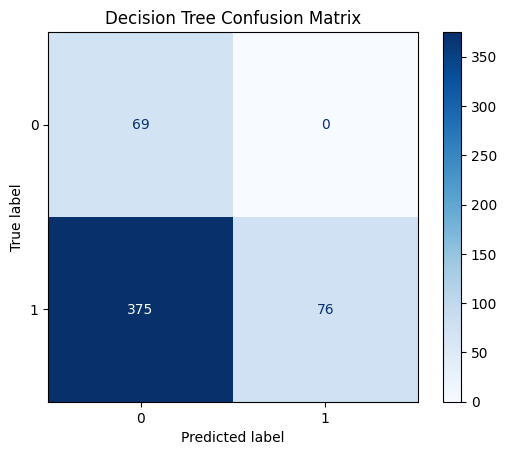

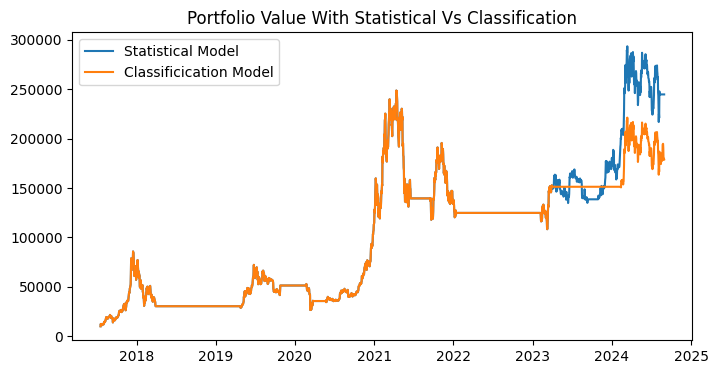

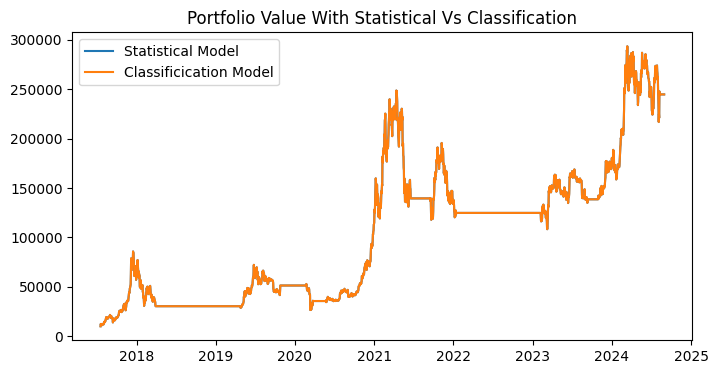

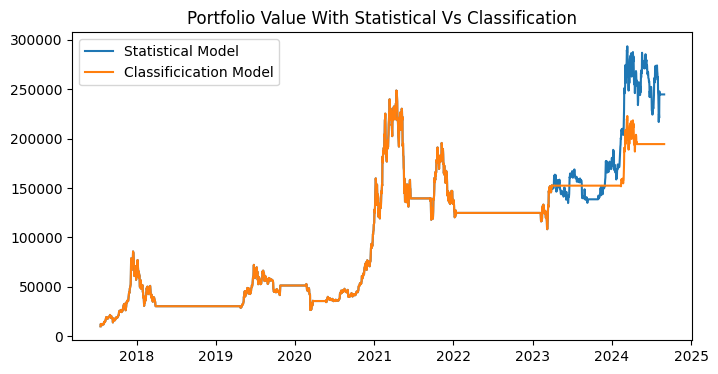

In [ ]:
# Strategy 6 : 50 Days and 200 Days MVA Crossover
df_rf_st6 =pd.DataFrame()
df_lr_st6 =pd.DataFrame()
df_dt_st6 =pd.DataFrame()
rf_model, lr_model, dt_model =train_model(X_train_st6, X_test_st6, y_train_st6, y_test_st6, 'st6')
rf_final_model_st6, rf_final_stat_st6, df_rf_st6 = simulate_trading(df.copy(), rf_model, 'Signal_50_200')
lr_final_model_st6, lr_final_stat_st6, df_lr_st6 = simulate_trading(df.copy(), lr_model, 'Signal_50_200')
dt_final_model_st6, dt_final_stat_st6, df_dt_st6 = simulate_trading(df.copy(), dt_model, 'Signal_50_200')

df_rf_st6.to_csv("BitCoin_df_rf_st6.csv")
df_lr_st6.to_csv("BitCoin_df_lr_st6.csv")
df_dt_st6.to_csv("BitCoin_df_dt_st6.csv")


In [ ]:
#Create an Empty Dataframe to Store Results
final_hold = 10000 * (df['Close'][len(df) - 1] / df['Close'][0])
df_result = pd.DataFrame(columns=['Strategy', 'Passive Model' , 'SMA Model' , 'RF Model', 'LR Model', 'DT Model'])
# Sore Results on DataFrame
df_result.loc[0] = ['Stragegy 5-20 SMA',final_hold, rf_final_stat_st1, rf_final_model_st1,lr_final_model_st1, dt_final_model_st1]
df_result.loc[1] = ['Stragegy 5-50 SMA',final_hold, rf_final_stat_st2, rf_final_model_st2,lr_final_model_st2, dt_final_model_st2]
df_result.loc[2] = ['Stragegy 5-200 SMA',final_hold, rf_final_stat_st3, rf_final_model_st3,lr_final_model_st3, dt_final_model_st3]
df_result.loc[3] = ['Stragegy 20-50 SMA',final_hold, rf_final_stat_st4, rf_final_model_st4,lr_final_model_st4, dt_final_model_st4]
df_result.loc[4] = ['Stragegy 20-200 SMA',final_hold, rf_final_stat_st5, rf_final_model_st5,lr_final_model_st5, dt_final_model_st5]
df_result.loc[5] = ['Stragegy 50-200 SMA',final_hold, rf_final_stat_st6, rf_final_model_st6,lr_final_model_st6, dt_final_model_st6]
df_result

<ipython-input-48-b302e9257939>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  final_hold = 10000 * (df['Close'][len(df) - 1] / df['Close'][0])


,Strategy,Passive Model,SMA Model,RF Model,LR Model,DT Model
0,Stragegy 5-20 SMA,260045.29869,243866.189519,509178.794618,243866.189519,519045.121542
1,Stragegy 5-50 SMA,260045.29869,381912.530705,402001.103465,380850.851036,280475.208496
2,Stragegy 5-200 SMA,260045.29869,245401.755092,183569.443689,244526.775654,199292.842519
3,Stragegy 20-50 SMA,260045.29869,150809.266884,200171.319698,145029.806558,160800.665456
4,Stragegy 20-200 SMA,260045.29869,211423.931821,141375.068553,211423.931821,155777.929450
5,Stragegy 50-200 SMA,260045.29869,244716.198982,178957.180612,244716.198982,194439.089262


In [ ]:
# Define a function to calculate XIRR
def xirr(cashflows, dates):
    # Define a helper function to calculate the present value of cash flows
    def npv(rate):
        return sum(cf / (1 + rate)**((d - dates[0]).days / 365.0) for cf, d in zip(cashflows, dates))

    # Use scipy's fsolve function to find the rate that makes the NPV 0 (internal rate of return)
    return opt.fsolve(lambda r: npv(r), 0.1, xtol=1e-4, maxfev=100)

In [ ]:
# Calculate XIRR
# Inputs: start price, end price, start date, end date
def xirrcalc(source_col, target_col):
    for i in range(0, len(df_result)):
        rate_of_return = 0
        #df_result[target_col] = df_result[target_col].astype(float)
        # Portfolio Calculation using Statistical direction
        end_price = df_result[source_col][i]
        cashflows = [-10000, end_price]
        dates = [datetime(2017, 7, 19), datetime(2024, 8, 31)]
        # Calculate XIRR
        rate_of_return = xirr(cashflows, dates)
        df_result.loc[df_result.index[i], target_col] = float(rate_of_return * 100)


In [ ]:
xirrcalc('Passive Model',' Passive XIRR%')
xirrcalc('SMA Model','SMA XIRR%')
xirrcalc('RF Model','RF Model XIRR%')
xirrcalc('LR Model','LR Model XIRR%')
xirrcalc('DT Model','DT Model XIRR%')
df_result

<ipython-input-50-8295990c8662>:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  df_result.loc[df_result.index[i], target_col] = float(rate_of_return * 100)
<ipython-input-50-8295990c8662>:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  df_result.loc[df_result.index[i], target_col] = float(rate_of_return * 100)
<ipython-input-50-8295990c8662>:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  df_result.loc[df_result.index[i], target_col] = float(rate_of_return * 

,Strategy,Passive Model,SMA Model,RF Model,LR Model,DT Model,Passive XIRR%,SMA XIRR%,RF Model XIRR%,LR Model XIRR%,DT Model XIRR%
0,Stragegy 5-20 SMA,260045.29869,243866.189519,509178.794618,243866.189519,519045.121542,57.997825,56.579443,73.627427,56.579443,74.095846
1,Stragegy 5-50 SMA,260045.29869,381912.530705,402001.103465,380850.851036,280475.208496,57.997825,66.756739,67.961144,66.691584,59.684259
2,Stragegy 5-200 SMA,260045.29869,245401.755092,183569.443689,244526.775654,199292.842519,57.997825,56.717480,50.458986,56.638916,52.204903
3,Stragegy 20-50 SMA,260045.29869,150809.266884,200171.319698,145029.806558,160800.665456,57.997825,46.363627,52.298911,45.562910,47.687674
4,Stragegy 20-200 SMA,260045.29869,211423.931821,141375.068553,211423.931821,155777.929450,57.997825,53.472743,45.042289,53.472743,47.031194
5,Stragegy 50-200 SMA,260045.29869,244716.198982,178957.180612,244716.198982,194439.089262,57.997825,56.655945,49.922462,56.655945,51.678976
